In [34]:
import pandas as pd
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
import sklearn.linear_model as sklm
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from matplotlib import pyplot as plt


def sigmoid(x):
    return 1/ ( 1 + np.exp(-x))

def logit(x):
    if x != 0:
        return x/(1 - x)
    else:
        return -999999999 # ...

In [7]:
wsb = pd.read_pickle('../wsb_cleaned.pkl')
wsb


,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
0,Nio day🚀🚀,Evdrmr,2021-01-01 23:55:39,None,https://i.redd.it/ytvyk6p47t861.jpg,0.70,11,0,15,0,False,False,False,kom7tp,1.609545e+09,None,t2_5o7wfxis
1,Stop making “meta” posts about awards. You ain...,None,2021-01-01 23:51:49,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,kom59t,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",NaN
2,Did I do something wrong (r/stocks),nathantheman,2021-01-01 23:49:52,None,https://i.redd.it/if5ewo146t861.jpg,1.00,1,0,0,0,False,False,False,kom3zp,1.609545e+09,None,t2_dwidc
3,Fuck r/stocks all my homies hate r/stocks,Danne080,2021-01-01 23:49:26,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.71,12,0,15,0,True,False,False,kom3oq,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_cyikut2
4,$ACAM 🚀🚀🚀🚀 Go big or go home - I’ll be posting...,None,2021-01-01 23:46:49,[deleted]\n,https://i.redd.it/bigbcmck5t861.jpg,1.00,1,0,0,0,False,False,False,kom1z8,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960960,ASO technical breakout and DD,rldkyce,2021-05-06 00:02:57,"good evening apes, fellow smooth brains\nfirst...",https://www.reddit.com/r/wallstreetbets/commen...,0.78,44,10,54,0,True,False,False,n5udz9,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>good evening...",t2_4p2nwfnu
960961,First YOLO on CRSR,None,2021-05-06 00:02:55,[deleted]\n,https://i.redd.it/l0729o9g5ex61.png,0.57,2,0,1,0,False,False,False,n5udy3,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN
960962,Rkt to the moon!,Disastrous-Egg9959,2021-05-06 00:02:43,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.48,0,0,11,0,True,False,False,n5udsv,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_7hzx72of
960963,My therapist told me I’m delusional for thinki...,None,2021-05-06 00:02:38,[deleted]\n,https://i.redd.it/f2up498f5ex61.jpg,0.33,0,0,1,0,False,False,False,n5udq9,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN


In [17]:
day_of_the_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
wsb['day'] = wsb['created_datetime_utc'].apply( lambda x :day_of_the_week[x.weekday()] )
wsb.groupby('day').agg('count')

,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
day,,,,,,,,,,,,,,,,,
Friday,164439,164439,164439,122827,164439,164439,164439,164439,164439,164439,164439,164439,164439,164439,164439,122827,116412
Monday,124980,124980,124980,90204,124980,124980,124980,124980,124980,124980,124980,124980,124980,124980,124980,90204,88656
Saturday,80059,80059,80059,60077,80059,80059,80059,80059,80059,80059,80059,80059,80059,80059,80059,60077,55708
Sunday,65930,65930,65930,48706,65930,65930,65930,65930,65930,65930,65930,65930,65930,65930,65930,48706,45998
Thursday,261045,261045,261045,193359,261045,261045,261045,261045,261045,261045,261045,261045,261045,261045,261045,193359,195167
Tuesday,124737,124737,124737,85862,124737,124737,124737,124737,124737,124737,124737,124737,124737,124737,124737,85862,89645
Wednesday,139775,139775,139775,98999,139775,139775,139775,139775,139775,139775,139775,139775,139775,139775,139775,98999,102857


<AxesSubplot:xlabel='day'>

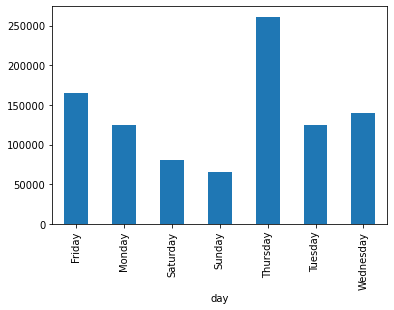

In [18]:
wsb.groupby('day').agg('count')['title'].plot(kind = 'bar')
# Note that this disagrees with https://www.kaggle.com/sprakshith/beginner-s-guide-to-sentiment-analysis
# This could be because of timezone artifacts... 


In [39]:
wsb['weektime'] = wsb['created_datetime_utc'].apply( lambda x : x.weekday()*24 + x.hour)
# Gets the number of hours since the start of the week

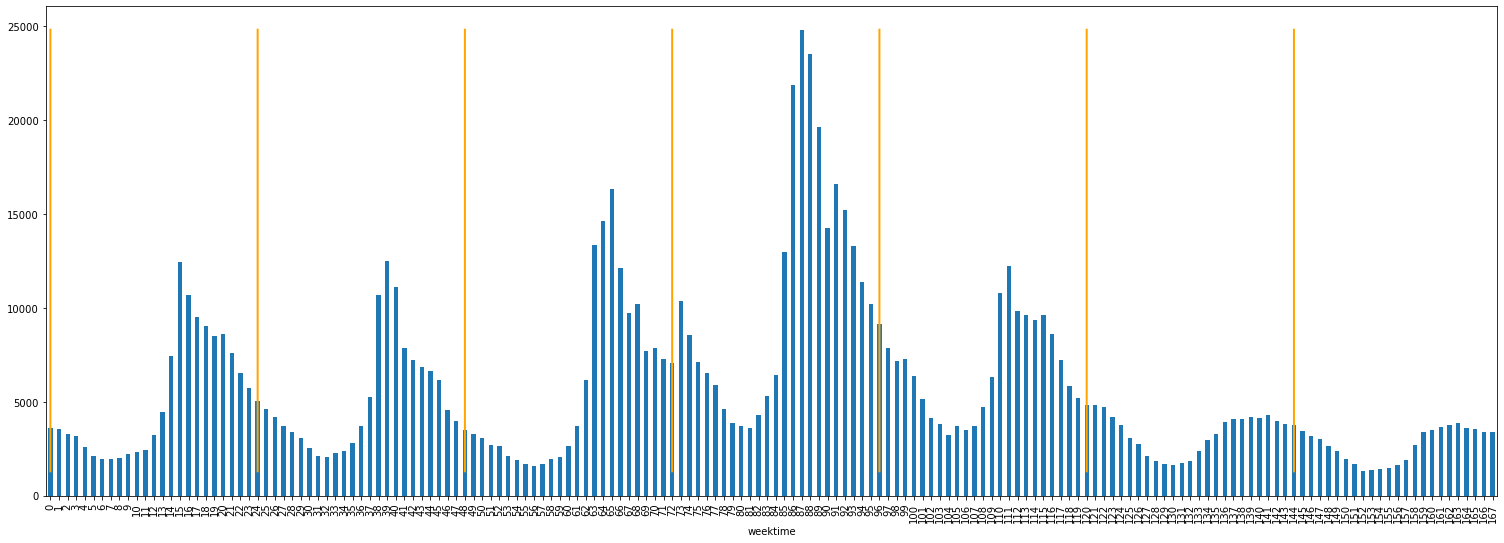

In [70]:

fig, ax = plt.subplots(figsize=(26, 9))

counted = wsb.groupby('weektime').agg('count')['ups']
max_count = max(counted)
min_count = min(counted)

wsb.groupby('weektime').agg('count')['ups'].plot(ax = ax, kind = 'bar')

#adding vertical line for midnight (in utc)
for i in range(7):
    ax.plot( np.zeros(max_count - min_count) + i*24 ,np.linspace( min_count, max_count, max_count - min_count),color = 'orange',linewidth=2.0)

In [75]:
max_count

'ups'

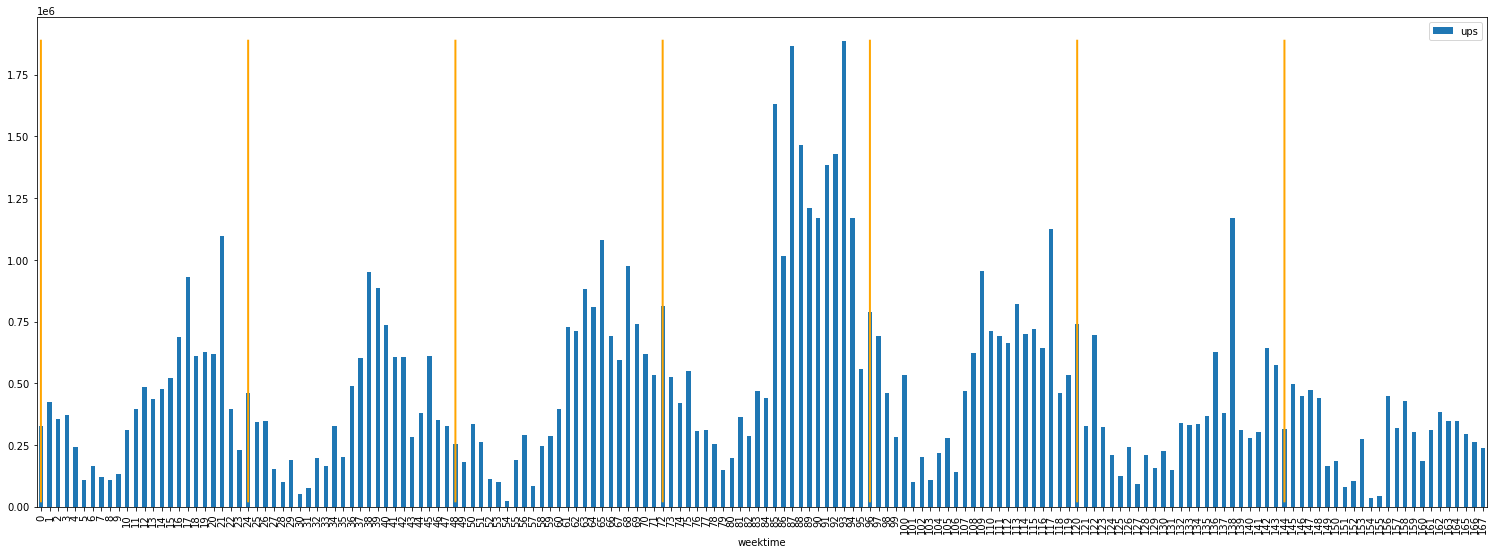

In [79]:
def plot_stat(stat = 'sum'):

    fig, ax = plt.subplots(figsize=(26, 9))

    agged_df = wsb[wsb.ups >= 2000][['ups', 'weektime']].groupby('weektime').agg(stat)
    agged_df.plot(ax = ax, kind = 'bar')

    max_count = max(agged_df['ups'])
    min_count = min(agged_df['ups'])
    num = int(max_count - min_count)
    #adding vertical line for midnight (in utc)
    for i in range(7):
        ax.plot( np.zeros(num) + i*24 ,np.linspace( min_count, max_count,num),color = 'orange',linewidth=2.0)

plot_stat('sum')
    
# There's a clear periodicity, but how much of this is due just to the periodicity in the number of posts...

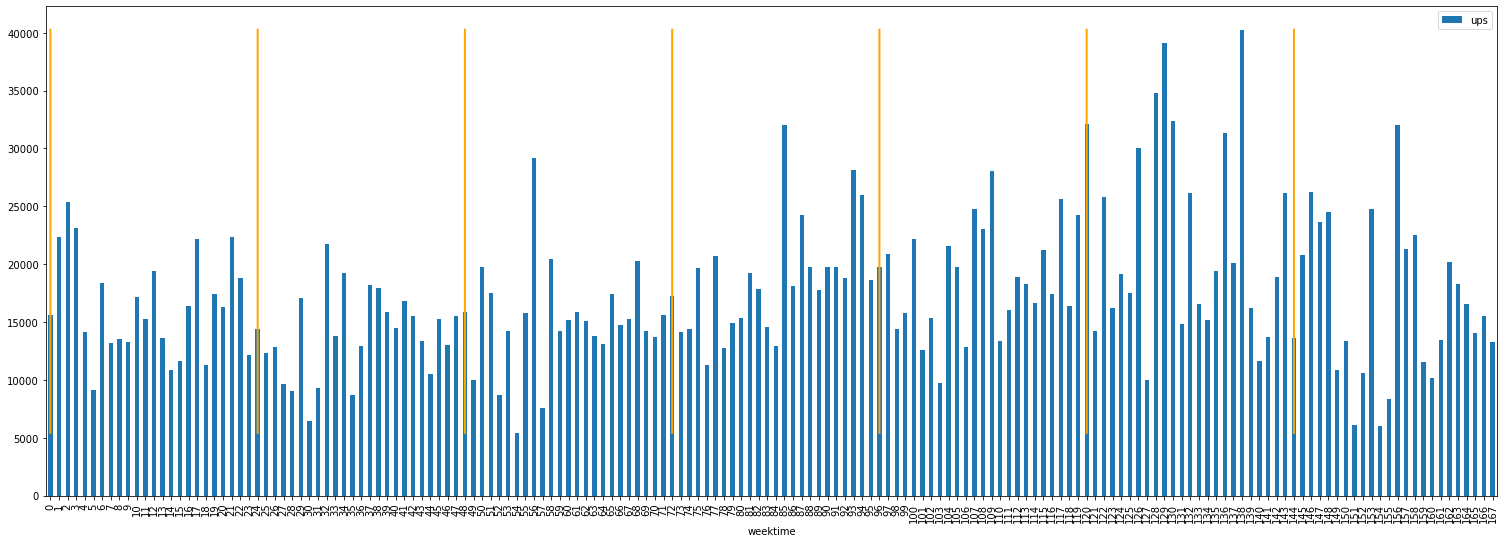

In [81]:
plot_stat('mean')
  

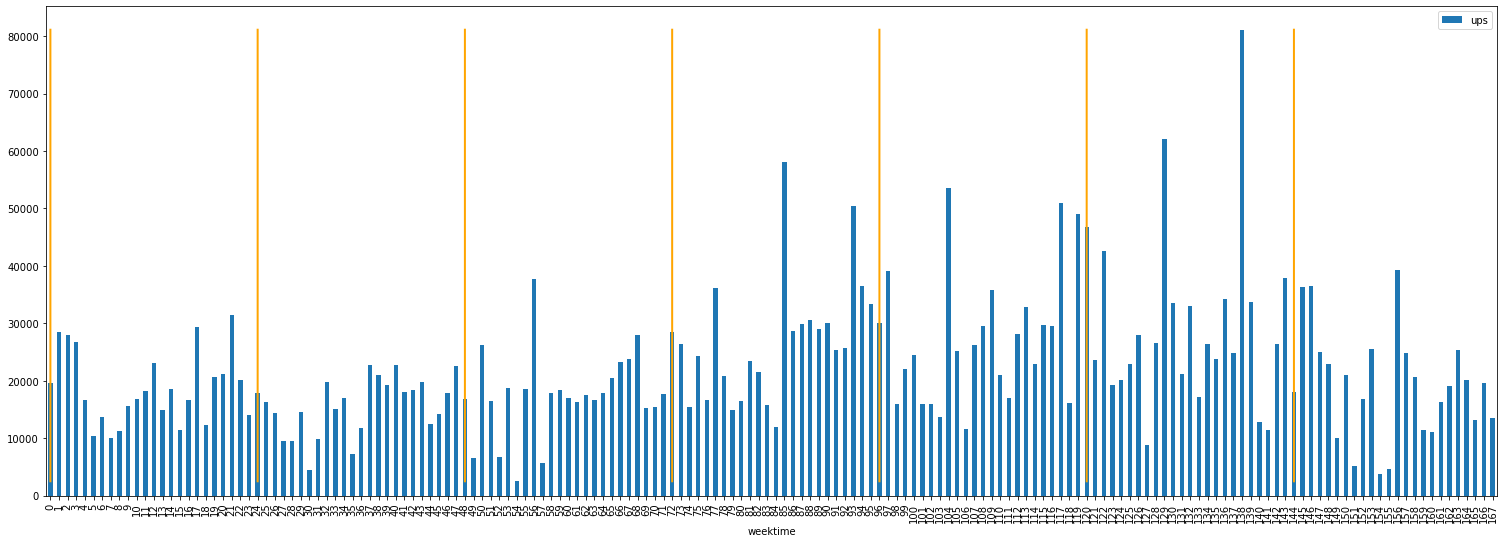

In [83]:
plot_stat('std')
  

In [3]:
regex = re.compile('[^a-zA-Z ]')

for col in ['title', 'author', 'selftext']:
    wsb[col] = wsb[col].apply(lambda x : regex.sub('', str(x) ))

In [9]:
# wsb_text = wsb[(wsb["selftext"] == True) & ( wsb.ups >= 200)]
#corpus = list( wsb_text["self_text"])
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html



In [88]:

#print(vectorizer.get_feature_names())

960965


In [122]:
wsb['ignored'] = wsb['ups'] <= 100
df = wsb #[ wsb['ups'] >= 20]
print(sum(wsb['ignored']))


41939


<AxesSubplot:ylabel='Frequency'>

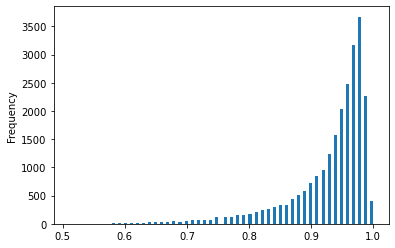

In [142]:
wsb[wsb['ups'] >= 100]['upvote_ratio'].plot( kind = 'hist', bins = 100)
# Have to filter out the ignored posts , which are the vast majority.
# This distribution roughly makes sense... since heavily downvoted posts don't get seen.

In [134]:
wsb['unpopular'] = wsb['upvote_ratio'] <= 1
wsb_noticed = wsb[~wsb['ignored']]
df = wsb_noticed #[ wsb['ups'] >= 20]
print(sum(wsb_noticed['unpopular'])/len(wsb_noticed))


1.0


In [ ]:

corpus = list(df["title"])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [127]:
import sklearn.naive_bayes as NB

y = df.unpopular

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)


clf = NB.BernoulliNB().fit(X = X_train, y = y_train)

preds = clf.predict(X_test)
print( "correct prediction ratio:" , sum ( preds == y_test) / len(y_test))

#results = pd.DataFrame()
#results["predicted"] = clf.predict(X_test)
#results["true"] = list(y_test)
#sns.scatterplot(data = results, x = "predicted", y = "true")

print( "compare" , sum(y_test)/len(y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

correct prediction ratio: 0.9588860422251458
compare 0.033094938983576176


array([[290658,   2584],
       [  9885,    152]], dtype=int64)

<AxesSubplot:xlabel='predicted', ylabel='true'>

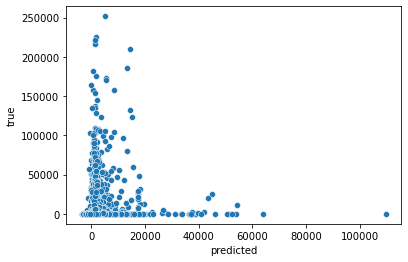

In [5]:


# y = list(map ( lambda x : sigmoid(x)  , wsb.upvote_ratio))
y = df.ups

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)


clf = sklm.Lasso().fit(X_train, y_train)

results = pd.DataFrame()

results["predicted"] = clf.predict(X_test)
results["true"] = list(y_test)
sns.scatterplot(data = results, x = "predicted", y = "true")


36941    7
38176    1
16550    1
20341    1
99534    1
        ..
38007    1
89018    1
33071    1
67360    1
15648    1
Name: ups, Length: 482981, dtype: int64

In [6]:
#

In [87]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())

In [86]:

#print(vectorizer2.get_feature_names())

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearRegression()),
])

In [113]:
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

def sigmoid(x):
    return 1/ ( 1 + np.exp(-x))

y = list(map ( lambda x : sigmoid(x)  , wsb_text.upvote_ratio))
X_train, X_test, y_train, y_test = train_test_split(X2.toarray(), y, test_size=0.33, random_state=42)


clf = LinearRegression(positive=True).fit(X_train, y_train)


<AxesSubplot:xlabel='predicted', ylabel='true'>

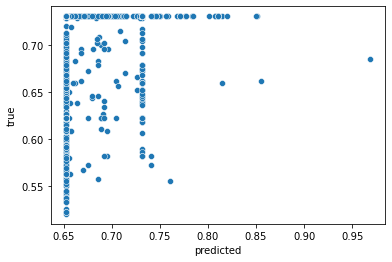

In [116]:

results = pd.DataFrame()
results["predicted"] = clf.predict(X_test)
results["true"] = y_test
sns.scatterplot(data = results, x = "predicted", y = "true")


In [106]:
wsb_text.score.describe()

count     4992.000000
mean        18.896635
std        323.637532
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      19066.000000
Name: score, dtype: float64

NameError: name 'wsb_text' is not defined